# Clustering performance evaluation

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.

- Adjusted Rand index
    - Advantages
    - Drawbacks
- Mathematical formulatio-Mutual Information based scores
    - Advantages
    - Drawbacks
    - Mathematical formulation
- Homogeneity, completeness and V-measure
    - Advantages
    - Drawbacks
    - Mathematical formulatio
- Fowlkes-Mallows scores
    - Advantages
    - Drawback

## Adjusted Rand index

- which is the corrected-for-chance version of the Rand index

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, **the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization**:

In [ ]:
actual = [1, 2, 3 , 5, 10, 11]

predicted = [1, 10, 11, 3, 2, 5 ]

It is defined as the number of pairs of objects that are either in the same group or in different groups in both partitions divided by the total number of pairs of objects. The Rand index lies between 0 and 1. When two partitions agree perfectly, the Rand index achieves the maximum value 1. A problem with Rand index is that the expected value of the Rand index between two random partitions is not a constant. This problem is corrected by the adjusted Rand index that assumes the generalized hyper-geometric distribution as the model of randomness. The adjusted Rand index has the maximum value 1, and its expected value is 0 in the case of random clusters. A larger adjusted Rand index means a higher agreement between two partitions. The adjusted Rand index is recommended for measuring agreement even when the partitions compared have different numbers of clusters.


The *Rand index or Rand measure* (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the **adjusted Rand index**. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

- a, the number of pairs of elements in  S that are in the same subset in  X and in the same subset in  Y
- b, the number of pairs of elements in  S that are in different subsets in  X and in different subsets in  Y
- c, the number of pairs of elements in  S that are in the same subset in  X and in different subsets in  Y
- d, the number of pairs of elements in  S that are in different subsets in  X and in the same subset in  Y

$R = $$\frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}$

$${\displaystyle \overbrace {ARI} ^{\text{Adjusted Index}}={\frac {\overbrace {\sum _{ij}{\binom {n_{ij}}{2}}} ^{\text{Index}}-\overbrace {[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}]/{\binom {n}{2}}} ^{\text{Expected Index}}}{\underbrace {{\frac {1}{2}}[\sum _{i}{\binom {a_{i}}{2}}+\sum _{j}{\binom {b_{j}}{2}}]} _{\text{Max Index}}-\underbrace {[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}]/{\binom {n}{2}}} _{\text{Expected Index}}}}}$$

where ${\displaystyle n_{ij},a_{i},b_{j}} n_{ij}$, $a_i$, $b_j$ are values from the contingency table.

In [13]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 1, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)  

0.11764705882352938

In [2]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_rand_score(labels_true, labels_pred)  

0.24242424242424246

In [5]:
labels_pred = [1, 10, 1, 0, 10, 0]
metrics.adjusted_rand_score(labels_true, labels_pred)  

0.24242424242424246

Furthermore, adjusted_rand_score is symmetric: swapping the argument does not change the score. It can thus be used as a consensus measure:

In [6]:
labels_pred = [1, 1, 2, 0, 2, 0]
metrics.adjusted_rand_score(labels_true, labels_pred)  

0.24242424242424246

Perfect labeling is scored 1.0:

In [9]:
labels_pred = labels_true[:]
print(id(labels_pred), id(labels_true))

metrics.adjusted_rand_score(labels_true, labels_pred)
print(labels_true, labels_pred)

140686911405512 140686911404424
[0, 0, 0, 1, 1, 1] [0, 0, 0, 1, 1, 1]


Bad (e.g. independent labelings) have negative or close to 0.0 scores:

In [16]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 0, 1, 1]
metrics.adjusted_rand_score(labels_true, labels_pred)  

-0.11111111111111108

In [5]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)  

-0.12903225806451613

### Advantages

- Random (uniform) label assignments have a ARI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Rand index or the V-measure for instance).
- Bounded range [-1, 1]: negative values are bad (independent labelings), similar clusterings have a positive ARI, 1.0 is the perfect match score.
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

### Drawbacks

- Contrary to inertia, ARI requires knowledge of the ground truth classes while is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

- However ARI can also be useful in a purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection (TODO).

### Example 

Automatically created module for IPython interactive environment
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.046s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.063s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.596s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.052s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.063s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.092s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.381s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.071s


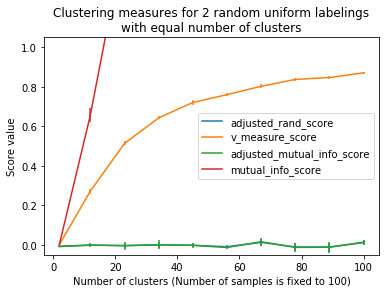

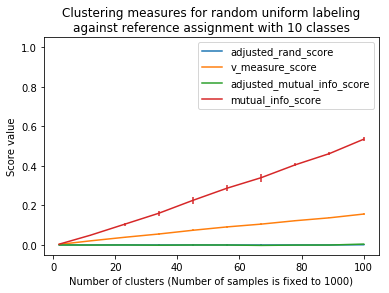

In [7]:
print(__doc__)

# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics


def uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    metrics.adjusted_mutual_info_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(ymin=-0.05, ymax=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(ymin=-0.05, ymax=1.05)
plt.legend(plots, names)
plt.show()

## Mutual Information based scores

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information(NMI) and Adjusted Mutual Information(AMI). NMI is often used in the literature while AMI was proposed more recently and is normalized against chance:

In [18]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

metrics.adjusted_mutual_info_score(labels_true, labels_pred) 

0.2250422831983088

In [22]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 1, 1, 1]

metrics.adjusted_mutual_info_score(labels_true, labels_pred) 

1.0

In [35]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 1, 1, 2]
print(metrics.adjusted_rand_score(labels_true, labels_pred))
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred) )

0.705882352941
0.571842564449


In [34]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 1, 5, 1]
print(metrics.adjusted_rand_score(labels_true, labels_pred))
metrics.adjusted_mutual_info_score(labels_true, labels_pred) 

0.705882352941


0.57184256444862269

One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score:

In [33]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)  

0.2250422831983088

All, mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score are symmetric: swapping the argument does not change the score. Thus they can be used as a consensus measure:

In [34]:
metrics.adjusted_mutual_info_score(labels_pred, labels_true)  

0.2250422831983088

Perfect labeling is scored 1.0:

In [35]:
labels_pred = labels_true[:]
metrics.adjusted_mutual_info_score(labels_true, labels_pred)
metrics.normalized_mutual_info_score(labels_true, labels_pred)

1.0

This is not true for mutual_info_score, which is therefore harder to judge:



In [36]:
metrics.mutual_info_score(labels_true, labels_pred)  

0.69314718055994518

In [37]:
# Bad
labels_true = [0, 0, 0, 1, 1, 5, 1, 1]
labels_pred = [1, 1, 3, 5, 2, 2, 2, 2]
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred) )
print(metrics.mutual_info_score(labels_true, labels_pred))

0.309198582275
0.69314718056


### Advantages

- Random (uniform) label assignments have a AMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).
- Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

### Drawbacks

- Contrary to inertia, MI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

    However MI-based measures can also be useful in purely unsupervised setting as a building block for a Consensus Index that can be used for clustering model selection.

- NMI and MI are not adjusted against chance.

> $H(U) = - $$\sum_{i=1}^{|U|}P(i)\log(P(i))$

where P(i) = |U_i| / N is the probability that an object picked at random from U falls into class U_i. 

Automatically created module for IPython interactive environment
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.078s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.062s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.570s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.052s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.071s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.096s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.378s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.095s


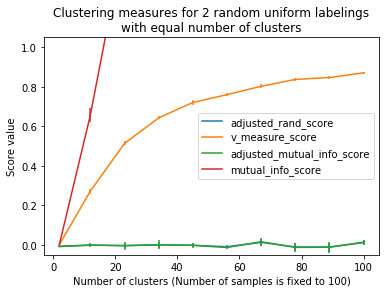

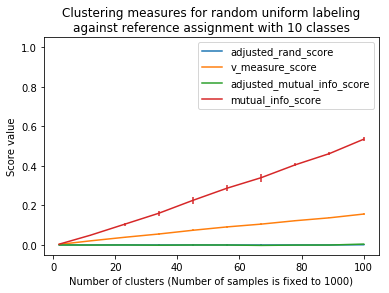

In [3]:
print(__doc__)

# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics


def uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    metrics.adjusted_mutual_info_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(ymin=-0.05, ymax=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(ymin=-0.05, ymax=1.05)
plt.legend(plots, names)
plt.show()

### Homogeneity, completeness and V-measure

Given the knowledge of the ground truth class assignments of the samples, it is possible to define some intuitive metric using conditional entropy analysis.

In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

- homogeneity: each cluster contains only members of a single class.
- completeness: all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. Both are bounded below by 0.0 and above by 1.0 (higher is better):

In [38]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

print(metrics.homogeneity_score(labels_true, labels_pred) ) 
print(metrics.completeness_score(labels_true, labels_pred) )

0.666666666667
0.420619835714


In [44]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 2, 2, 0, 0, 2]

print(metrics.homogeneity_score(labels_true, labels_pred)) 
print(metrics.completeness_score(labels_true, labels_pred))

0.0817041659455
0.0817041659455


In [47]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 1, 1, 0, 0, 1]

print(metrics.homogeneity_score(labels_true, labels_pred)) 
print(metrics.completeness_score(labels_true, labels_pred))

0.0817041659455
0.0817041659455


In [49]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 0, 2, 2, 2]

print(metrics.homogeneity_score(labels_true, labels_pred)) 
print(metrics.completeness_score(labels_true, labels_pred))

1.0
1.0


Their harmonic mean called V-measure is computed by v_measure_score:

In [5]:
metrics.v_measure_score(labels_true, labels_pred)    

0.51580374297938891

The V-measure is actually equivalent to the mutual information (NMI) discussed above normalized by the sum of the label entropies. 

Homogeneity, completeness and V-measure can be computed at once using homogeneity_completeness_v_measure as follows:

metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

The following clustering assignment is slightly better, since it is homogeneous but not complete:

In [7]:
labels_pred = [0, 0, 0, 1, 2, 2]
metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

(1.0, 0.68533147896158653, 0.81328983350367623)

Note v_measure_score is symmetric: it can be used to evaluate the agreement of two independent assignments on the same dataset.
This is not the case for completeness_score and homogeneity_score: both are bound by the relationship:


In [11]:

metrics.homogeneity_score(labels_true, labels_pred) == metrics.completeness_score(labels_pred, labels_true)

True

#### Advantages

- Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.
- Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

#### Drawbacks

- The previously introduced metrics are not normalized with regards to random labeling: this means that depending on the number of samples, clusters and ground truth classes, a completely random labeling will not always yield the same values for homogeneity, completeness and hence v-measure. In particular random labeling won’t yield zero scores especially when the number of clusters is large.

- This problem can safely be ignored when the number of samples is more than a thousand and the number of clusters is less than 10. For smaller sample sizes or larger number of clusters it is safer to use an adjusted index such as the Adjusted Rand Index (ARI).

- These metrics require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

Automatically created module for IPython interactive environment
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.048s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.092s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.806s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.082s
Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.099s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.114s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.504s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.097s


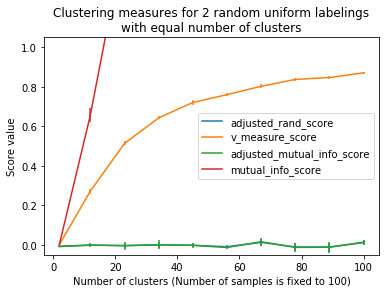

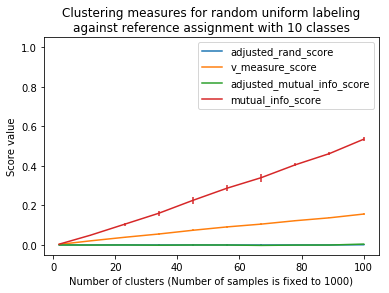

In [50]:
print(__doc__)

# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics


def uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    """Compute score for 2 random uniform cluster labelings.

    Both random labelings have the same number of clusters for each value
    possible value in ``n_clusters_range``.

    When fixed_n_classes is not None the first labeling is considered a ground
    truth class assignment with fixed number of classes.
    """
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

score_funcs = [
    metrics.adjusted_rand_score,
    metrics.v_measure_score,
    metrics.adjusted_mutual_info_score,
    metrics.mutual_info_score,
]

# 2 independent random clusterings with equal cluster number

n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n"
          "with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(ymin=-0.05, ymax=1.05)


# Random labeling with varying n_clusters against ground class labels
# with fixed number of clusters

n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(ymin=-0.05, ymax=1.05)
plt.legend(plots, names)
plt.show()

### Fowlkes-Mallows scores

The Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score) can be used when the ground truth class assignments of the samples is known. The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall:

$\text{FMI} = $$\frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}}$

Where TP is the number of True Positive (i.e. the number of pair of points that belong to the same clusters in both the true labels and the predicted labels), FP is the number of False Positive (i.e. the number of pair of points that belong to the same clusters in the true labels and not in the predicted labels) and FN is the number of False Negative (i.e the number of pair of points that belongs in the same clusters in the predicted labels and not in the true labels).

The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

In [13]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

In [14]:
metrics.fowlkes_mallows_score(labels_true, labels_pred) 

0.47140452079103173

One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score

In [15]:
labels_pred = [1, 1, 0, 0, 3, 3]
metrics.fowlkes_mallows_score(labels_true, labels_pred)  

0.47140452079103173

Perfect labeling is scored 1.0:

In [16]:
labels_pred = labels_true[:]
metrics.fowlkes_mallows_score(labels_true, labels_pred) 

1.0

Bad (e.g. independent labelings) have zero scores:

In [17]:
labels_true = [0, 1, 2, 0, 3, 4, 5, 1]
labels_pred = [1, 1, 0, 0, 2, 2, 2, 2]
metrics.fowlkes_mallows_score(labels_true, labels_pred)  

0.0

#### Advantages

- Random (uniform) label assignments have a FMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).
- Bounded range [0, 1]: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a AMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).
- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

#### Drawbacks

Contrary to inertia, FMI-based measures require the knowledge of the ground truth classes while almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting).

## Reference

- http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
- https://en.wikipedia.org/wiki/Rand_index
- http://www.jmlr.org/papers/volume7/decampos06a/decampos06a.pdf
- https://en.wikipedia.org/wiki/Mutual_information
- http://faculty.washington.edu/kayee/pca/supp.pdf
- http://www.jmlr.org/papers/volume11/vinh10a/vinh10a.pdf